# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

Edición 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

sns.set_context('talk')
sns.set(font_scale=4)

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), "news_dataset.csv"))

In [3]:
df.shape

(221513, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221513 entries, 0 to 221512
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            221513 non-null  int64 
 1   ticker        221513 non-null  object
 2   title         221513 non-null  object
 3   category      221513 non-null  object
 4   content       221505 non-null  object
 5   release_date  221513 non-null  object
 6   provider      221513 non-null  object
 7   url           221513 non-null  object
 8   article_id    221513 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 15.2+ MB


In [5]:
df.head(5)

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [6]:
df.describe()

,id,article_id
count,221513.000000,2.215130e+05
mean,332271.337872,9.510278e+07
std,63945.826913,9.956825e+07
min,221515.000000,6.690000e+02
25%,276893.000000,4.657470e+05
50%,332271.000000,2.038949e+06
75%,387650.000000,2.003073e+08
max,443028.000000,2.005073e+08


In [7]:
# view column names
df.columns

Index(['id', 'ticker', 'title', 'category', 'content', 'release_date',
       'provider', 'url', 'article_id'],
      dtype='object')

In [8]:
# check for missing values
df.isnull().sum()

id              0
ticker          0
title           0
category        0
content         8
release_date    0
provider        0
url             0
article_id      0
dtype: int64

In [9]:
provider_count = df["provider"].value_counts()\
    .reset_index()\
    .rename(columns={'index': 'provider', 'provider': 'frequency'})


for i, row in enumerate(provider_count.itertuples(), 1):
    print(row)

Pandas(Index=0, provider='Zacks Investment Research', frequency=88072)
Pandas(Index=1, provider='Reuters', frequency=55100)
Pandas(Index=2, provider='Investing.com', frequency=18466)
Pandas(Index=3, provider='Seeking Alpha', frequency=12987)
Pandas(Index=4, provider='Bloomberg', frequency=3422)
Pandas(Index=5, provider='The Motley Fool', frequency=1251)
Pandas(Index=6, provider='Nicholas Santiago', frequency=1065)
Pandas(Index=7, provider='Gregory W. Harmon', frequency=972)
Pandas(Index=8, provider='Estimize', frequency=962)
Pandas(Index=9, provider='Ryan Mallory', frequency=905)
Pandas(Index=10, provider='International Business Times', frequency=896)
Pandas(Index=11, provider='iFOREX', frequency=765)
Pandas(Index=12, provider='Dr. Duru', frequency=735)
Pandas(Index=13, provider='CNBC', frequency=665)
Pandas(Index=14, provider='Tim Knight', frequency=659)
Pandas(Index=15, provider='Benzinga ', frequency=650)
Pandas(Index=16, provider='Cointelegraph', frequency=643)
Pandas(Index=17, pro

In [10]:
provider_count_filter = provider_count[provider_count["frequency"] >= 1000]

In [12]:
provider_count_filter

,provider,frequency
0,Zacks Investment Research,88072
1,Reuters,55100
2,Investing.com,18466
3,Seeking Alpha,12987
4,Bloomberg,3422
5,The Motley Fool,1251
6,Nicholas Santiago,1065


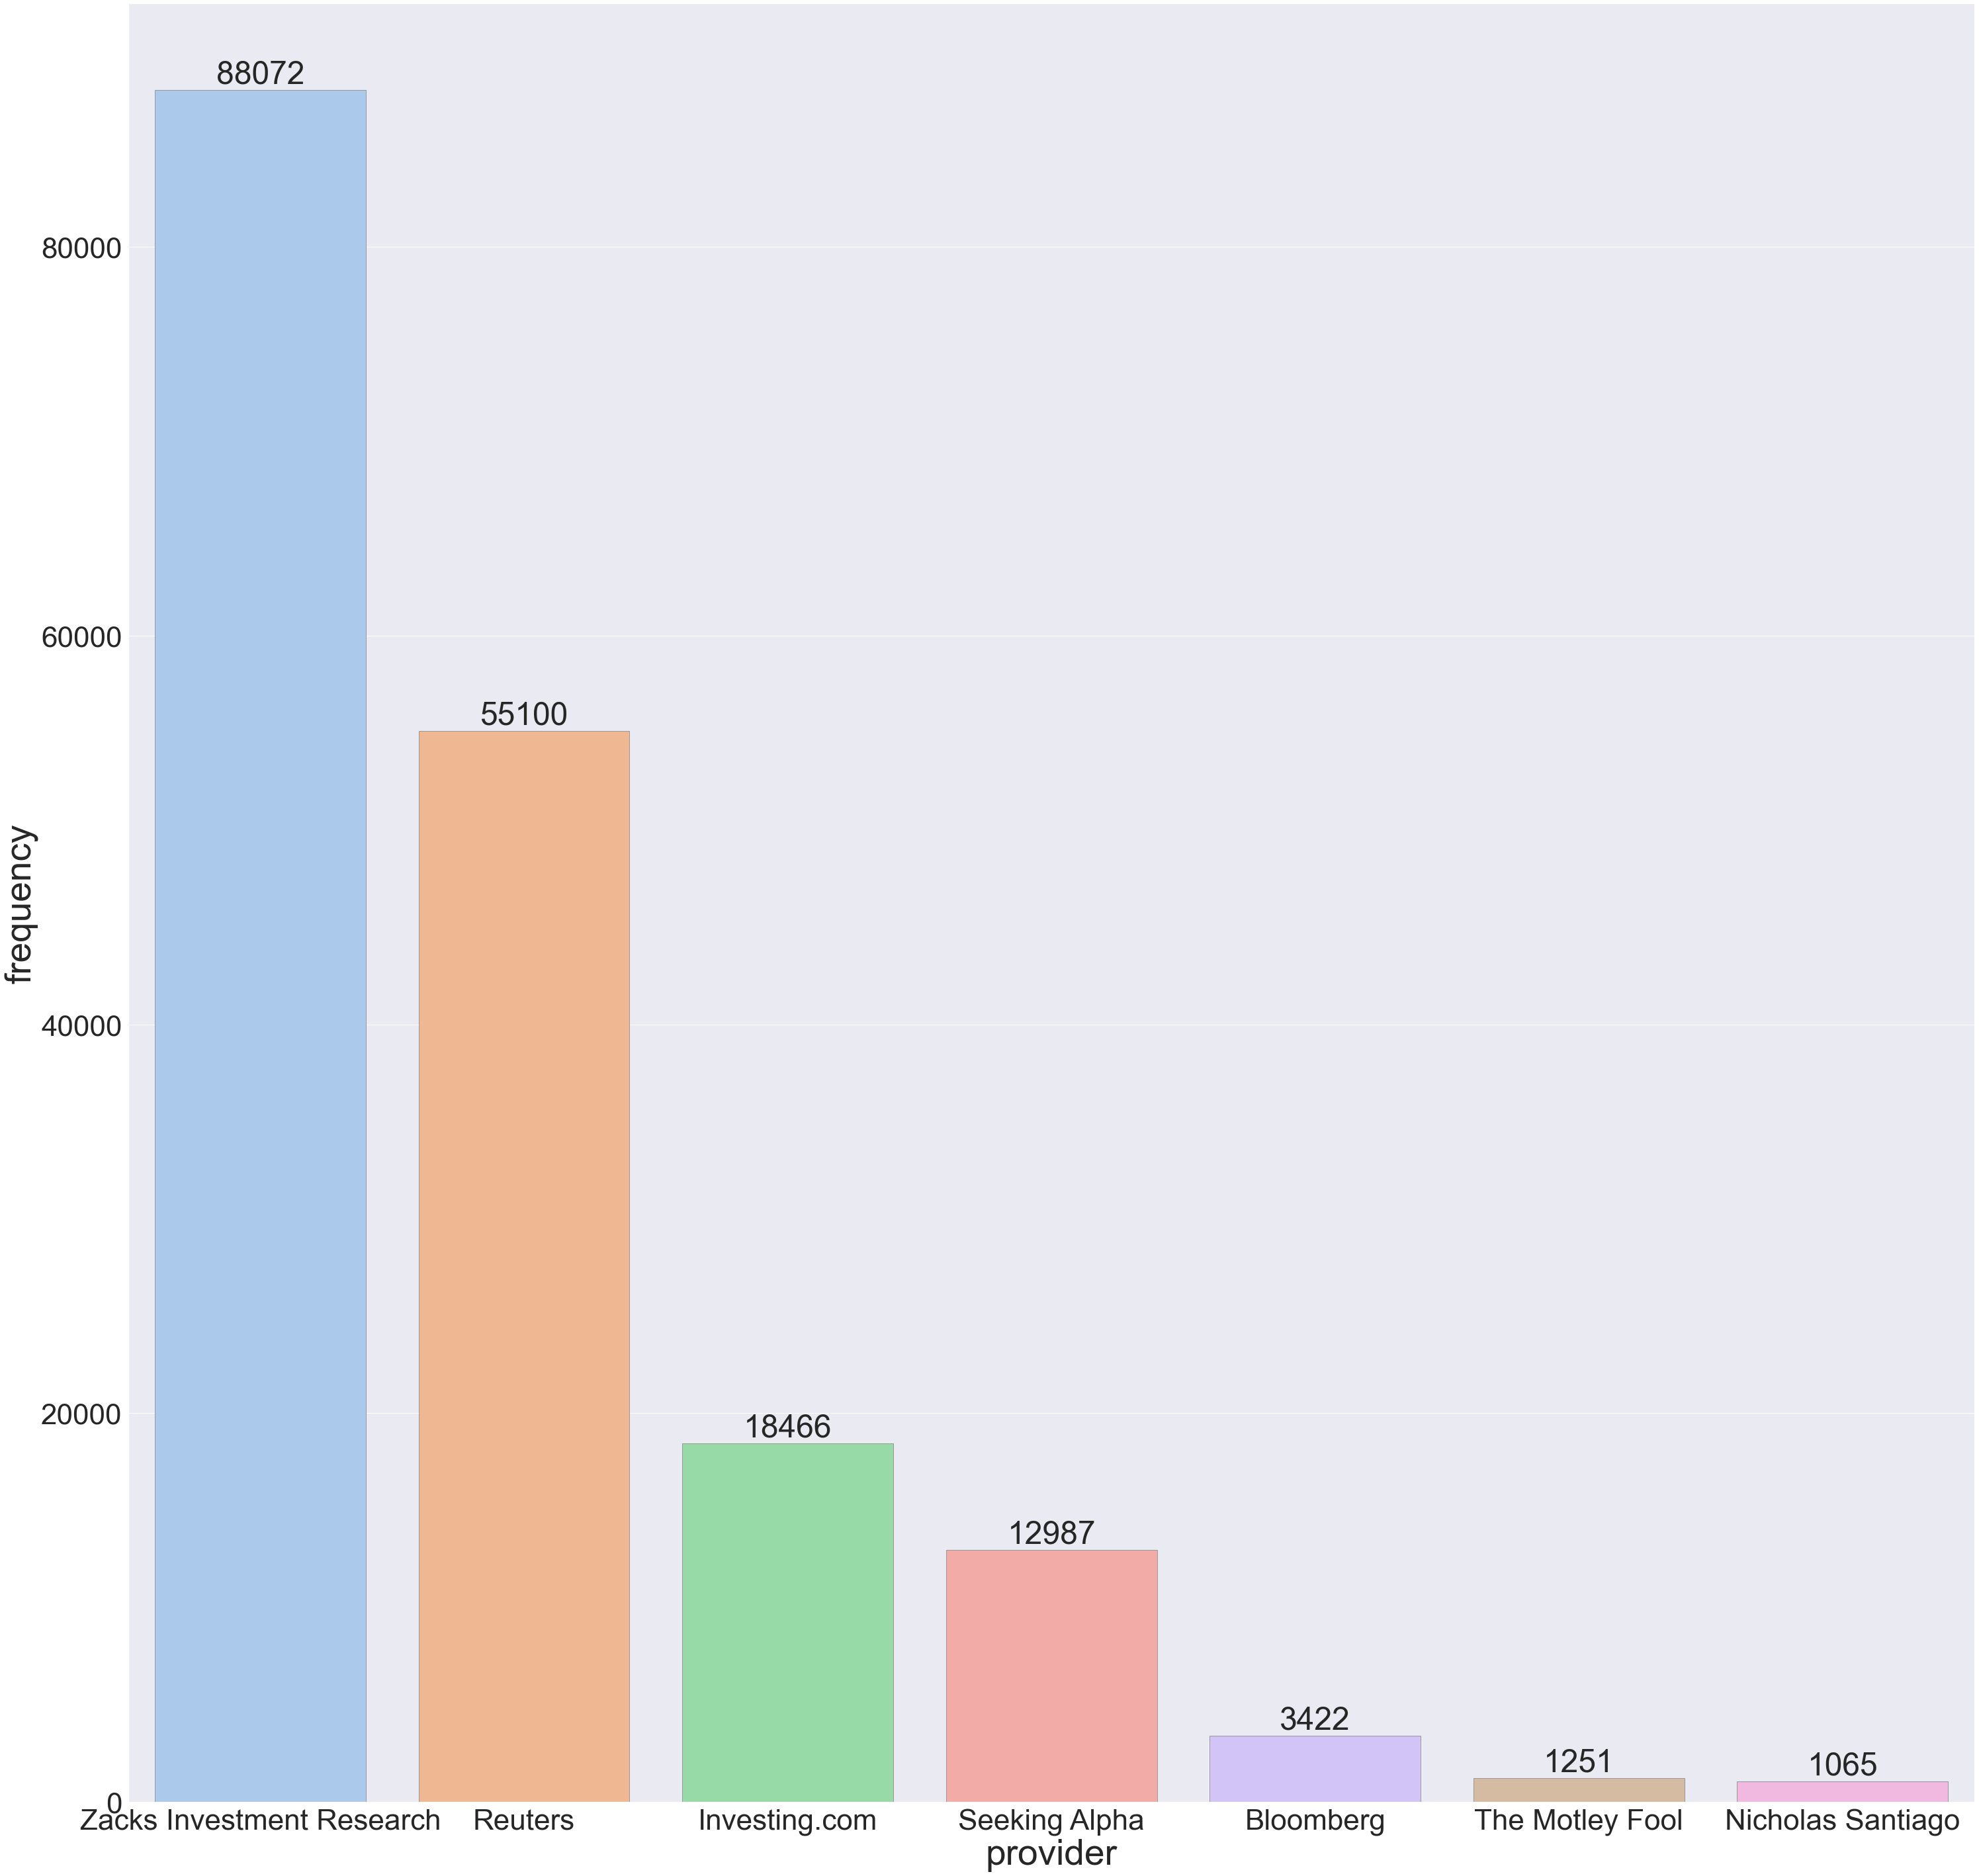

In [13]:
plt.figure(figsize=(50,50))

plt.xlabel('provider', fontsize=55)
plt.ylabel('frequency', fontsize=55)

ax = sns.barplot(x="provider", y="frequency" , palette="pastel", edgecolor=".6", data=provider_count_filter)
ax.bar_label(ax.containers[0])
sns.despine()

# Cantidad de noticias por año

In [14]:
# Creo un nuevo dataframe
new_df = df.copy()

In [15]:
# Creo una nueva columna en la que solo pongo el anio de la noticia, para ello
# convierto la columna "release_date" en tipo datetime para acceder a la propiedad year 
new_df['release_date_year'] = pd.to_datetime(new_df['release_date']).dt.year

In [16]:
new_df

,id,ticker,title,category,content,release_date,provider,url,article_id,release_date_year
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327,2020
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196,2020
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249,2020
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039,2020
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096,2020
...,...,...,...,...,...,...,...,...,...,...
221508,443024,T,Crude And Steel Still In Sync,opinion,We have been reporting on the trade off betwee...,2012-10-04,Ivan Kitov,https://www.investing.com/analysis/crude-and-s...,138733,2012
221509,443025,T,Forget AT T This Is The Telecom Stock You Sho...,opinion,It s the largest cell phone provider in the wo...,2012-05-30,StreetAuthority,https://www.investing.com/analysis/forget-at-t...,124829,2012
221510,443026,T,Wall Street Exposed Part 3 How Dividends C...,opinion,Before we dicuss how the mechanism of dividend...,2012-07-16,Portfolio Cafe,https://www.investing.com/analysis/wall-street...,129651,2012
221511,443027,T,Weighing The Week Ahead It s All About Jobs,opinion,From start to finish the coming week will hav...,2012-09-02,Jeff Miller,https://www.investing.com/analysis/weighing-th...,134926,2012


In [17]:
news_per_year_count = new_df["release_date_year"].value_counts()\
    .reset_index()\
    .rename(columns={'index': 'year', 'release_date_year': 'news_per_year'})


for i, row in enumerate(news_per_year_count.itertuples(), 0):
    print(row)

Pandas(Index=0, year=2019, news_per_year=58003)
Pandas(Index=1, year=2018, news_per_year=42606)
Pandas(Index=2, year=2017, news_per_year=41634)
Pandas(Index=3, year=2016, news_per_year=28551)
Pandas(Index=4, year=2015, news_per_year=12661)
Pandas(Index=5, year=2020, news_per_year=9347)
Pandas(Index=6, year=2013, news_per_year=8313)
Pandas(Index=7, year=2012, news_per_year=7009)
Pandas(Index=8, year=2014, news_per_year=5958)
Pandas(Index=9, year=2009, news_per_year=4514)
Pandas(Index=10, year=2011, news_per_year=2220)
Pandas(Index=11, year=2008, news_per_year=479)
Pandas(Index=12, year=2010, news_per_year=218)


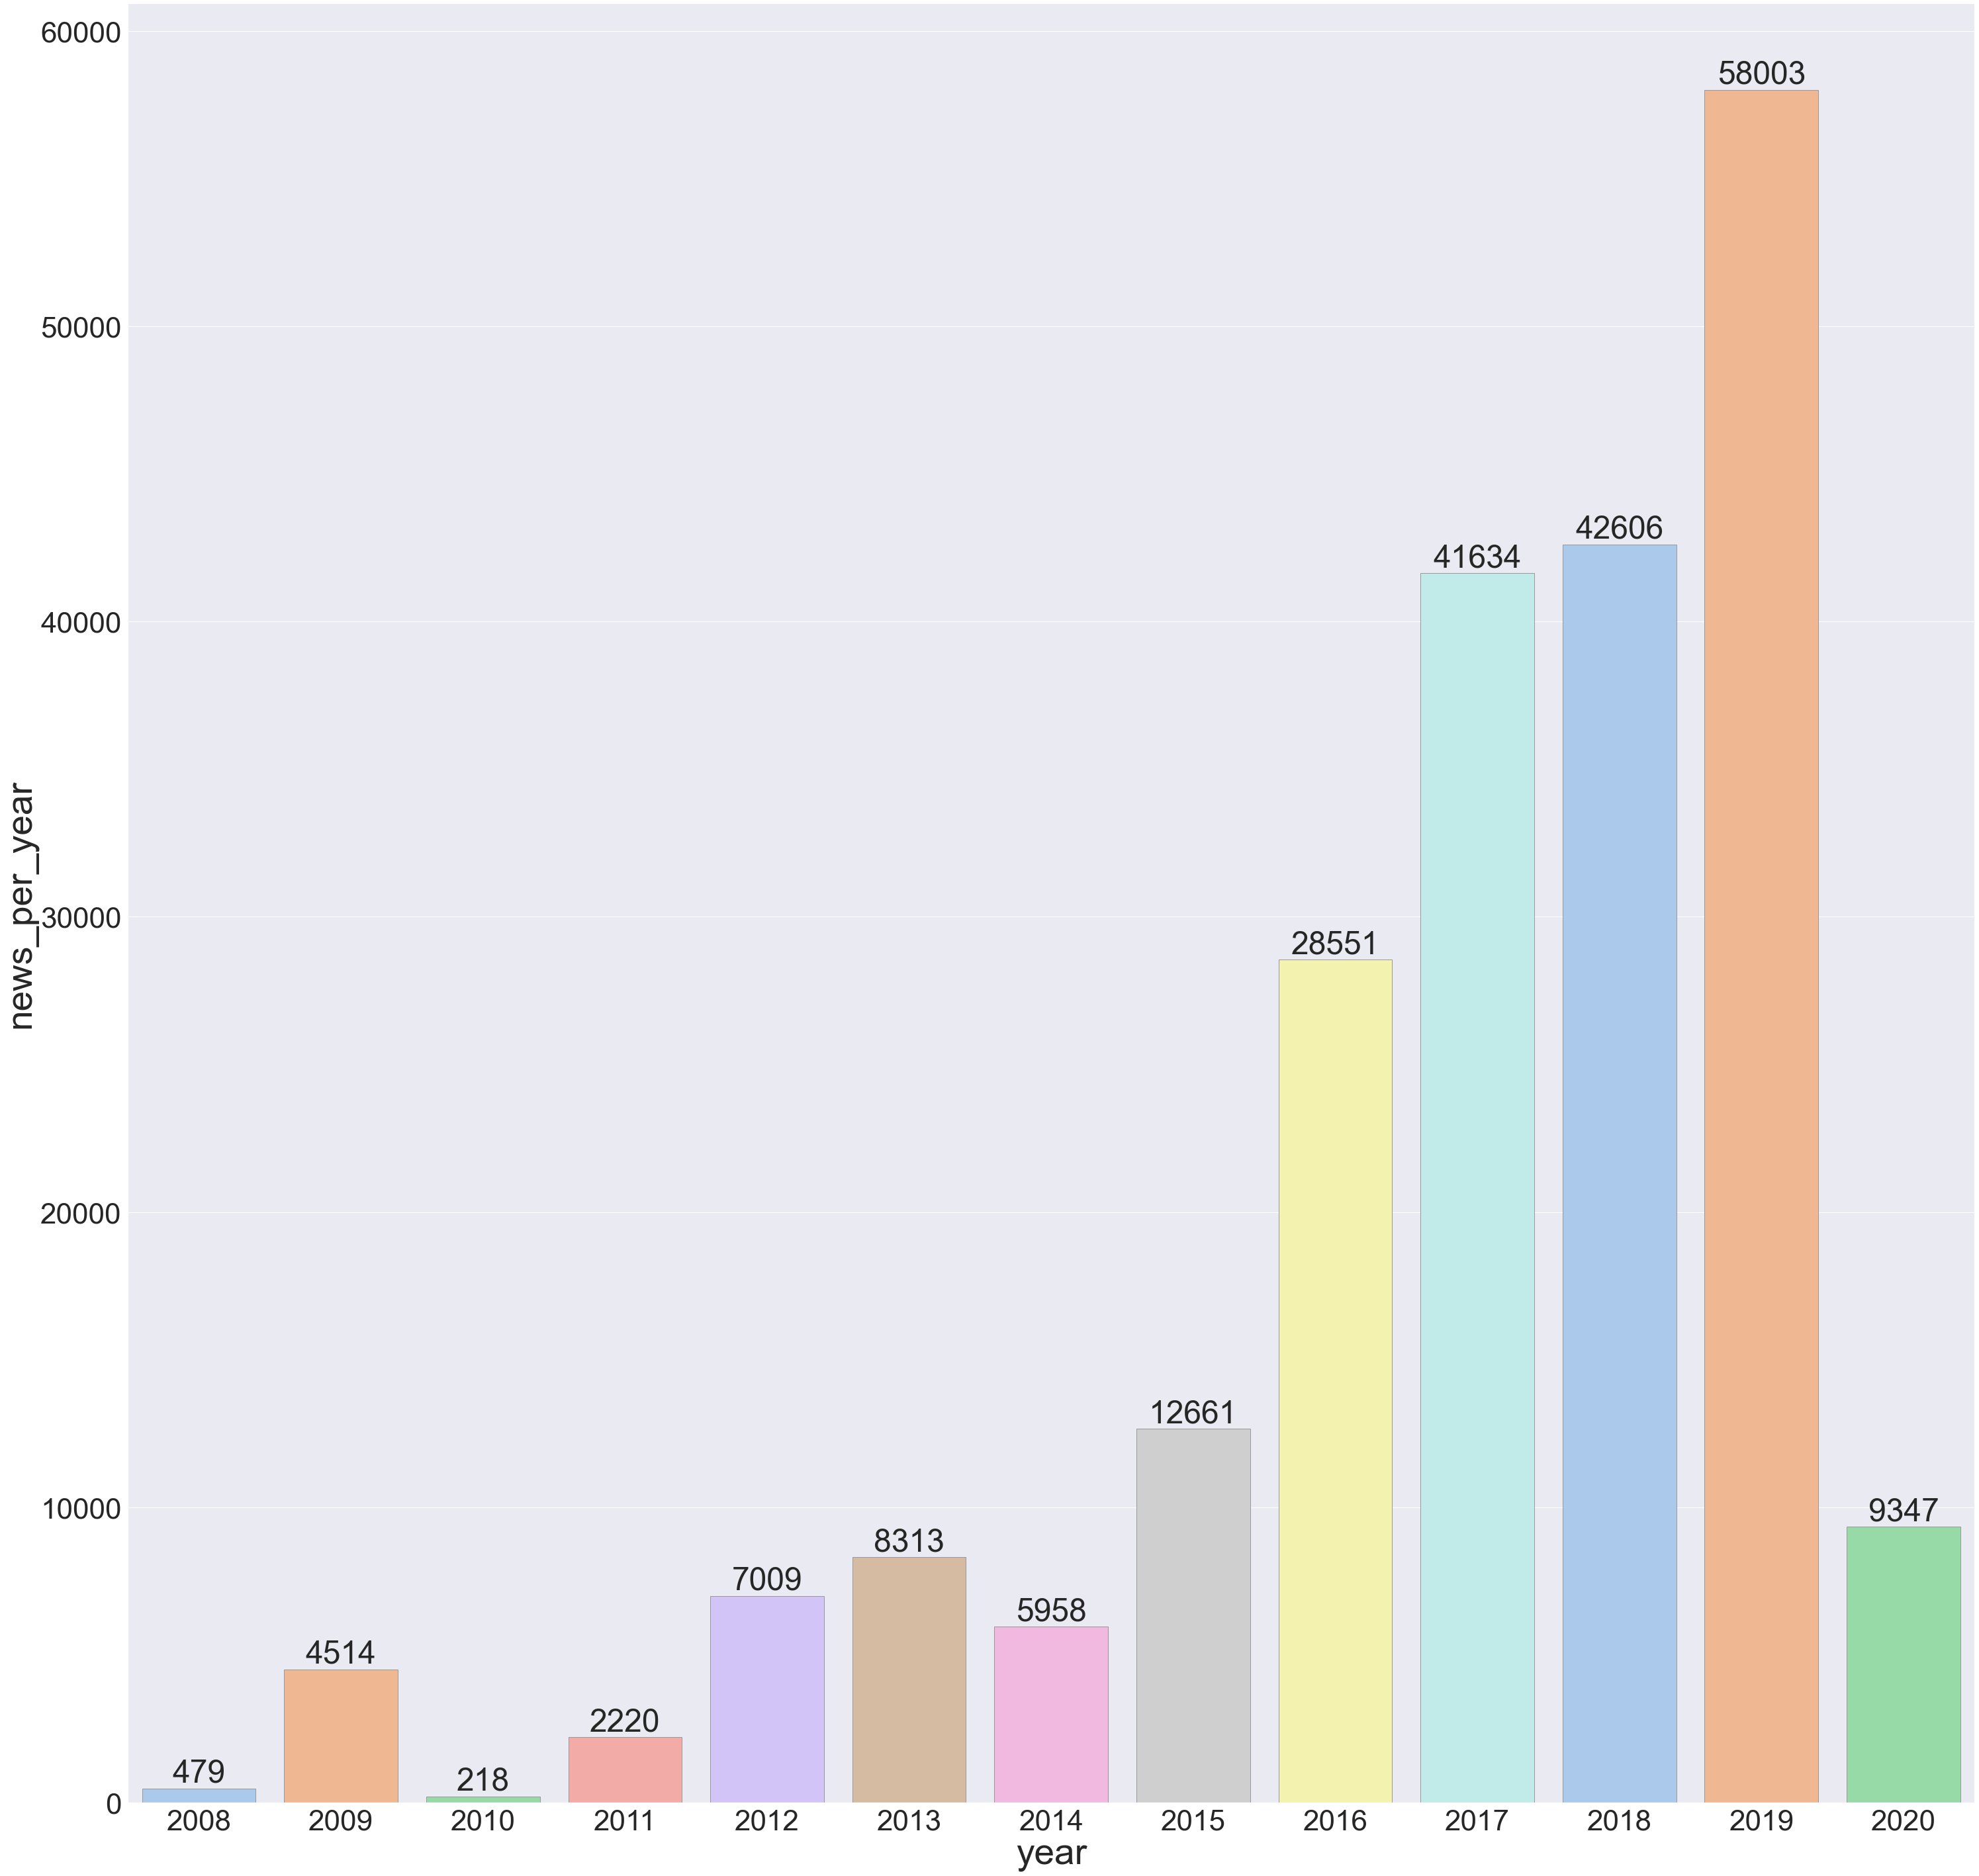

In [18]:
plt.figure(figsize=(50,50))

plt.xlabel('provider', fontsize=55)
plt.ylabel('frequency', fontsize=55)

ax = sns.barplot(x="year", y="news_per_year" , palette="pastel", edgecolor=".6", data=news_per_year_count)
ax.bar_label(ax.containers[0])
sns.despine()

# Cantidad de noticias por ticker

In [19]:
news_per_ticker_count = new_df["ticker"].value_counts()\
    .reset_index()\
    .rename(columns={'index': 'ticker', 'ticker': 'news_per_ticker'})


for i, row in enumerate(news_per_ticker_count.itertuples(), 0):
    print(row)

Pandas(Index=0, ticker='AAPL', news_per_ticker=20231)
Pandas(Index=1, ticker='MSFT', news_per_ticker=8110)
Pandas(Index=2, ticker='BAC', news_per_ticker=7409)
Pandas(Index=3, ticker='AMZN', news_per_ticker=6330)
Pandas(Index=4, ticker='NWSA', news_per_ticker=5914)
Pandas(Index=5, ticker='BA', news_per_ticker=5879)
Pandas(Index=6, ticker='GOOGL', news_per_ticker=5171)
Pandas(Index=7, ticker='GS', news_per_ticker=4513)
Pandas(Index=8, ticker='TSLA', news_per_ticker=4283)
Pandas(Index=9, ticker='NFLX', news_per_ticker=3806)
Pandas(Index=10, ticker='TGT', news_per_ticker=3689)
Pandas(Index=11, ticker='INTC', news_per_ticker=3188)
Pandas(Index=12, ticker='DIS', news_per_ticker=2875)
Pandas(Index=13, ticker='XOM', news_per_ticker=2831)
Pandas(Index=14, ticker='JPM', news_per_ticker=2600)
Pandas(Index=15, ticker='MS', news_per_ticker=2498)
Pandas(Index=16, ticker='GM', news_per_ticker=2089)
Pandas(Index=17, ticker='C', news_per_ticker=2082)
Pandas(Index=18, ticker='GE', news_per_ticker=2045)


In [20]:
news_per_ticker_count_filter = news_per_ticker_count[news_per_ticker_count["news_per_ticker"] >= 2500]

In [21]:
news_per_ticker_count_filter

,ticker,news_per_ticker
0,AAPL,20231
1,MSFT,8110
2,BAC,7409
3,AMZN,6330
4,NWSA,5914
5,BA,5879
6,GOOGL,5171
7,GS,4513
8,TSLA,4283
9,NFLX,3806


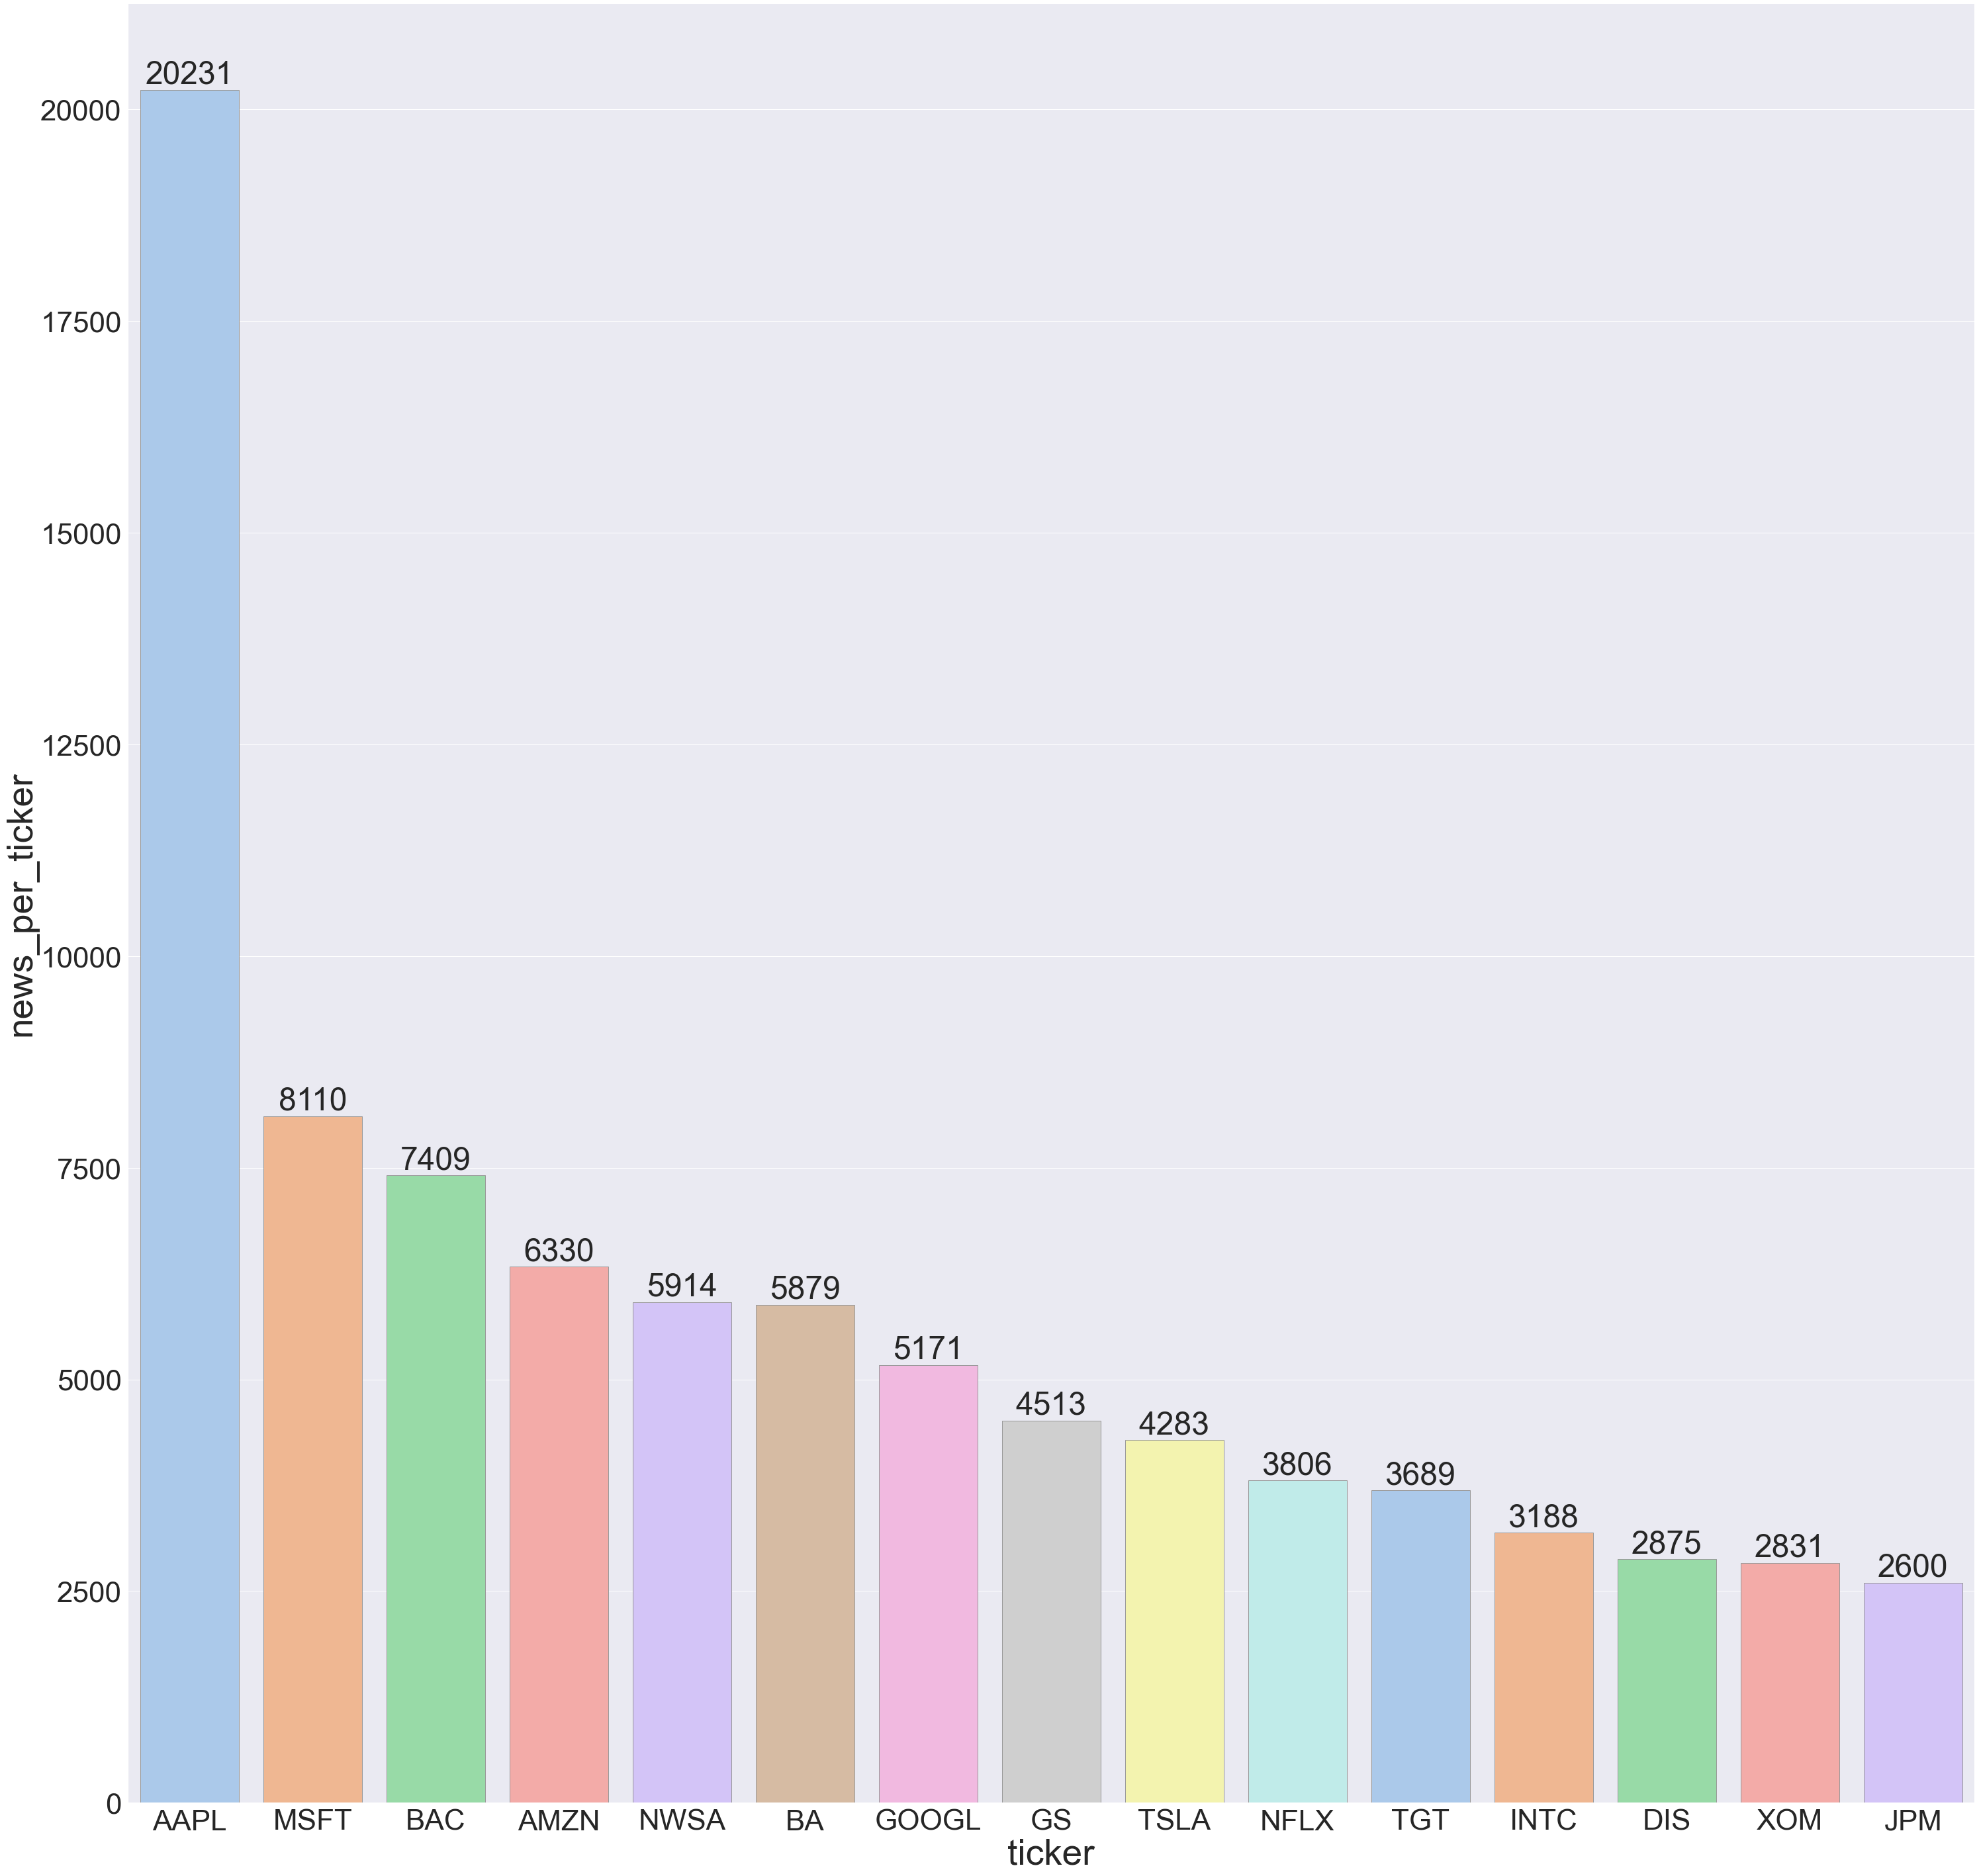

In [22]:
plt.figure(figsize=(50,50))

plt.xlabel('ticker', fontsize=55)
plt.ylabel('news_per_ticker', fontsize=55)

ax = sns.barplot(x="ticker", y="news_per_ticker", palette="pastel", edgecolor=".6", data=news_per_ticker_count_filter)
ax.bar_label(ax.containers[0])
sns.despine()

# Cantidad de noticias por ticker y por año

In [35]:
group_by_df = new_df.copy()

In [36]:
group_by_df = group_by_df[(df["ticker"]=="AAPL") | (df["ticker"]=="MSFT")].groupby(['ticker','release_date_year']).size().reset_index(name='counts_news')
sort_group_by_df = group_by_df.copy()
sort_group_by_df = sort_group_by_df.sort_values(by=['release_date_year'], ascending=True)
sort_group_by_df = sort_group_by_df.reset_index(drop=True)


In [37]:
sort_group_by_df

,ticker,release_date_year,counts_news
0,MSFT,2008,5
1,MSFT,2009,66
2,MSFT,2010,1
3,MSFT,2011,37
4,MSFT,2012,99
5,AAPL,2012,264
6,AAPL,2013,484
7,MSFT,2013,168
8,AAPL,2014,720
9,MSFT,2014,163


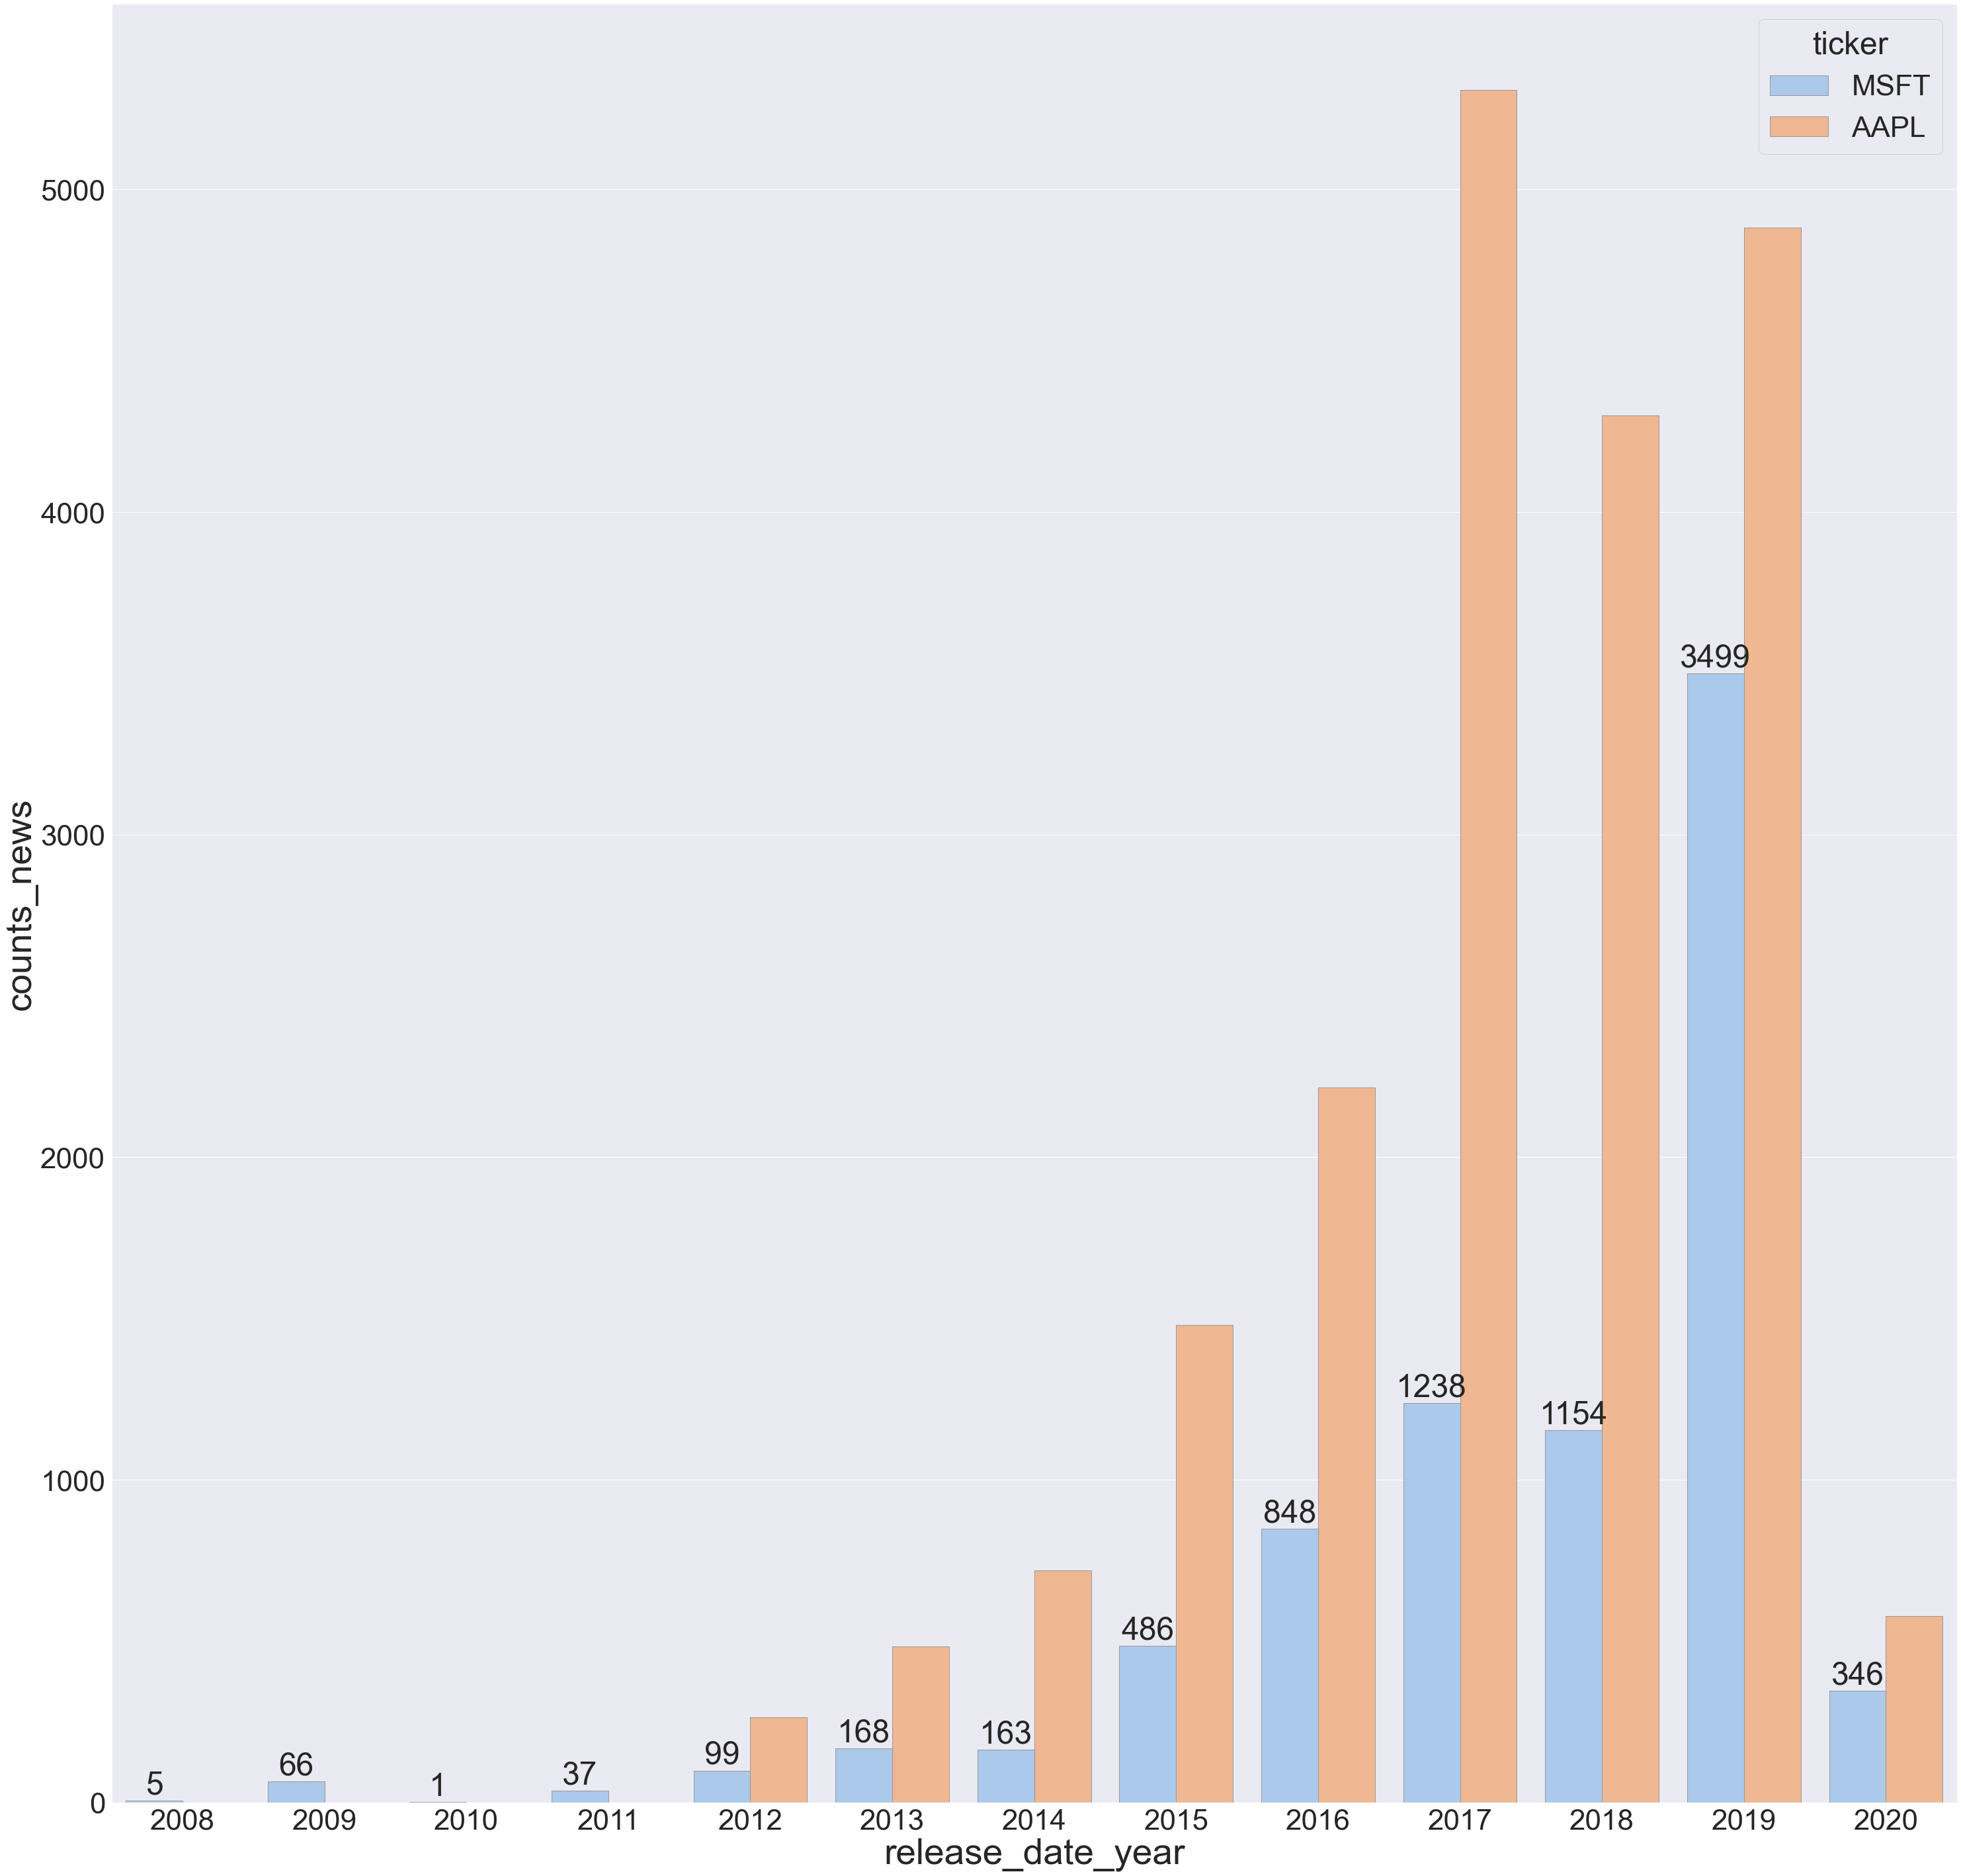

In [41]:
#set seaborn plotting aesthetics
plt.figure(figsize=(50,50))

plt.xlabel('release_date_year', fontsize=55)
plt.ylabel('counts_news', fontsize=55)

#create grouped bar chart
ax = sns.barplot(x='release_date_year', y='counts_news', hue='ticker', palette="pastel", edgecolor=".6", data=sort_group_by_df)
ax.bar_label(ax.containers[0])
sns.despine()
    
sns.despine()